In [1]:
from amuse.units import units
from amuse.lab import Huayno, nbody_system, new_galactics_model
from amuse.lab import Gadget2
from amuse.community.ph4.interface import ph4
import copy
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
%%time

# Milky Way := Mdisk = 4.5 Mbulge | Mhalo = 100 Mbulge
# Andromeda := Mdisk = 4-7 Mbulge | Mhalo = 87 Mbulge
# Mdisk = 5 Mbulge, Mhalo = 95 Mbulge

n_halo  = 5000.0
n_bulge = 50.0
n_disk  = 250.0
M_galaxy = 1e12 | units.MSun
R_galaxy = 80  | units.kpc
converter = nbody_system.nbody_to_si(M_galaxy, R_galaxy)

galaxy1 = new_galactics_model(n_halo,
                                converter,
                                do_scale=True,
                                bulge_number_of_particles=n_bulge,
                                disk_number_of_particles=n_disk)
# Order of particles: Disk => Bulge => Halo

In [3]:
%%time

galaxy2 = new_galactics_model(n_halo,
                                converter,
                                do_scale=True,
                                bulge_number_of_particles=n_bulge,
                                disk_number_of_particles=n_disk)

CPU times: user 1.95 s, sys: 949 ms, total: 2.9 s
Wall time: 3.42 s


In [4]:
#print(galaxy1)

In [5]:
#print(galaxy2)

In [6]:
%%time

converter = nbody_system.nbody_to_si(1.e12|units.MSun, 100|units.kpc)
dynamics = Gadget2(converter, number_of_workers=2)

CPU times: user 222 ms, sys: 85.3 ms, total: 308 ms
Wall time: 292 ms


In [7]:
%%time
galaxy1.rotate(0., np.pi/2, 0.)
galaxy2.x  += 400 | units.kpc
galaxy2.vx += -500 |units.kms

dynamics.parameters.epsilon_squared = (100|units.parsec)**2
set1 = dynamics.particles.add_particles(galaxy1)
set2 = dynamics.particles.add_particles(galaxy2)
#dynamics.particles.move_to_center()

CPU times: user 29 ms, sys: 8.38 ms, total: 37.3 ms
Wall time: 37.4 ms


In [8]:
#gravity = ph4(converter)

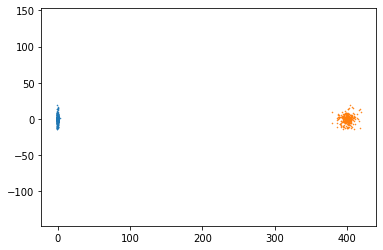

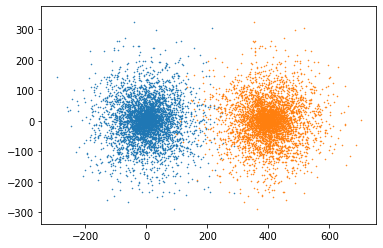

In [9]:
plt.scatter(galaxy1.x[:300].value_in(units.kpc), galaxy1.y[:300].value_in(units.kpc), s=0.3)
plt.scatter(galaxy2.x[:300].value_in(units.kpc), galaxy2.y[:300].value_in(units.kpc), s=0.3)
plt.axis("equal")
plt.show()

plt.scatter(galaxy1.x[300:].value_in(units.kpc), galaxy1.y[300:].value_in(units.kpc), s=0.3)
plt.scatter(galaxy2.x[300:].value_in(units.kpc), galaxy2.y[300:].value_in(units.kpc), s=0.3)
plt.axis("equal")
plt.show()

In [ ]:
#dynamics.scale_to_standard(converter)
#gravity.particles.add_particles(dynamics.particles)
channel = dynamics.particles.new_channel_to(dynamics.particles)

times = np.arange(0, 10000, 20) | units.Myr
for time in tqdm(times):
    dynamics.evolve_model(time)
    channel.copy()

 58%|█████▊    | 289/500 [01:24<00:59,  3.57it/s]

In [ ]:
plt.scatter(set1.x[:300].value_in(units.kpc), set1.y[:300].value_in(units.kpc), s=0.3)
plt.scatter(set2.x[:300].value_in(units.kpc), set2.y[:300].value_in(units.kpc), s=0.3)
plt.title("Disk + Bulge")
plt.axis("equal")
plt.show()

plt.scatter(set1.x[300:].value_in(units.kpc), set1.y[300:].value_in(units.kpc), s=0.3)
plt.scatter(set2.x[300:].value_in(units.kpc), set2.y[300:].value_in(units.kpc), s=0.3)
plt.title("Halo")
plt.axis("equal")
plt.show()